## Importing libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset - ( Link: https://snap.stanford.edu/data/email-Eu-core.html )

In [2]:
edges_file = "./main-edges-email-sna.csv"
edges = pd.read_csv(edges_file)

In [3]:
edges

,Source,Target,Type,Id,Label,Weight
0,0,1,Directed,0,NaN,1
1,2,3,Directed,1,NaN,1
2,2,4,Directed,2,NaN,1
3,5,6,Directed,3,NaN,1
4,5,7,Directed,4,NaN,1
...,...,...,...,...,...,...
25566,420,143,Directed,25566,NaN,1
25567,174,859,Directed,25567,NaN,1
25568,440,460,Directed,25568,NaN,1
25569,52,786,Directed,25569,NaN,1


In [4]:
edges["Source"]

0          0
1          2
2          2
3          5
4          5
        ... 
25566    420
25567    174
25568    440
25569     52
25570    506
Name: Source, Length: 25571, dtype: int64

In [5]:
edges["Source"].unique()

array([   0,    2,    5,    8,   10,   12,   15,   17,   20,   23,   41,
         43,   45,   47,   49,   52,   54,   60,   62,   64,   66,   68,
         42,   70,   72,   71,   73,   75,   77,   80,   19,   82,   22,
         21,   88,   90,   92,   89,   97,  103,   51,  108,  113,  115,
        117,   76,  122,   14,  124,   13,  127,  131,   40,   18,   56,
        134,  135,  137,  139,  141,  143,  144,  146,   83,  148,  150,
        151,  152,  153,  154,  156,  158,    4,  133,  160,   84,  164,
        165,  167,  123,  169,   24,   81,  173,  174,  176,  180,  181,
        129,  184,  185,  106,  188,  191,  192,  208,   61,  209,  211,
        212,   30,  155,   48,  214,   96,  216,  170,   98,   74,  229,
        100,  230,  231,  233,  245,  246,  248,  175,  232,  254,  249,
        222,  183,  259,  251,  262,  263,  264,  269,  271,   46,  275,
        277,  101,   29,  279,  281,  282,  285,  258,   69,  280,  162,
        293,  189,  295,  287,  298,  147,  301,  3

#### Finding nodes

In [6]:
pd.DataFrame(edges["Source"].unique()).value_counts()

0       1
614     1
599     1
600     1
601     1
       ..
296     1
297     1
298     1
299     1
1003    1
Length: 868, dtype: int64

In [7]:
pd.DataFrame(edges["Target"].unique()).value_counts()

0       1
652     1
654     1
655     1
656     1
       ..
335     1
336     1
337     1
338     1
1004    1
Length: 991, dtype: int64

In [8]:
nodes = pd.DataFrame()
nodes['column_sum'] = pd.DataFrame(set(edges['Source']).union(set(edges['Target'])))

In [9]:
nodes['column_sum'].unique()

array([   0,    1,    2, ..., 1002, 1003, 1004], dtype=int64)

In [10]:
nodes["not_sorted_id"] = pd.DataFrame(nodes['column_sum'].unique())

In [11]:
nodes.drop('column_sum',axis=1,inplace=True)

In [12]:
nodes["not_sorted_id"].value_counts()

0       1
675     1
662     1
663     1
664     1
       ..
340     1
341     1
342     1
343     1
1004    1
Name: not_sorted_id, Length: 1005, dtype: int64

In [13]:
nodes["id"] = pd.DataFrame(nodes["not_sorted_id"].sort_values())

In [14]:
nodes["id"]

0          0
1          1
2          2
3          3
4          4
        ... 
1000    1000
1001    1001
1002    1002
1003    1003
1004    1004
Name: id, Length: 1005, dtype: int64

In [15]:
nodes.drop('not_sorted_id',axis=1,inplace=True)

In [16]:
nodes

,id
0,0
1,1
2,2
3,3
4,4
...,...
1000,1000
1001,1001
1002,1002
1003,1003


In [17]:
edges

,Source,Target,Type,Id,Label,Weight
0,0,1,Directed,0,NaN,1
1,2,3,Directed,1,NaN,1
2,2,4,Directed,2,NaN,1
3,5,6,Directed,3,NaN,1
4,5,7,Directed,4,NaN,1
...,...,...,...,...,...,...
25566,420,143,Directed,25566,NaN,1
25567,174,859,Directed,25567,NaN,1
25568,440,460,Directed,25568,NaN,1
25569,52,786,Directed,25569,NaN,1


In [18]:
G = nx.Graph()

for n, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'])
for n, row in nodes.iterrows():
    G.add_node(row['id'])

In [19]:
degree_dict = dict(G.degree())

In [20]:
degree_dict

{0: 44,
 1: 52,
 2: 95,
 3: 71,
 4: 96,
 5: 171,
 6: 115,
 7: 72,
 8: 37,
 9: 40,
 10: 47,
 11: 76,
 12: 58,
 13: 180,
 14: 80,
 15: 52,
 16: 74,
 17: 111,
 18: 56,
 19: 72,
 20: 74,
 21: 138,
 22: 15,
 23: 81,
 24: 40,
 25: 33,
 26: 35,
 27: 63,
 28: 105,
 29: 58,
 30: 68,
 31: 50,
 32: 35,
 33: 30,
 34: 31,
 35: 59,
 36: 45,
 37: 37,
 38: 47,
 39: 36,
 40: 60,
 41: 91,
 42: 75,
 43: 14,
 44: 106,
 45: 48,
 46: 73,
 47: 51,
 48: 59,
 49: 15,
 50: 17,
 51: 69,
 52: 26,
 53: 40,
 54: 51,
 55: 43,
 56: 48,
 57: 67,
 58: 126,
 59: 53,
 60: 55,
 61: 71,
 62: 216,
 63: 125,
 64: 170,
 65: 91,
 66: 36,
 67: 9,
 68: 48,
 69: 64,
 70: 18,
 71: 18,
 72: 8,
 73: 31,
 74: 93,
 75: 22,
 76: 24,
 77: 25,
 78: 23,
 79: 44,
 80: 72,
 81: 113,
 82: 233,
 83: 141,
 84: 132,
 85: 39,
 86: 218,
 87: 139,
 88: 33,
 89: 71,
 90: 29,
 91: 31,
 92: 44,
 93: 87,
 94: 44,
 95: 48,
 96: 120,
 97: 25,
 98: 25,
 99: 29,
 100: 41,
 101: 29,
 102: 23,
 103: 52,
 104: 33,
 105: 146,
 106: 142,
 107: 221,
 108: 43,
 

#### Number of nodes: 1005
#### Number of edges: 16706

In [21]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 1005
Number of edges: 16706


In [22]:
nx.set_node_attributes(G, degree_dict, 'size')
for node in G.nodes():
    G.nodes[node]['size'] = degree_dict[node] * 10
sizes = [G.degree(n) * 10 for n in G.nodes()]

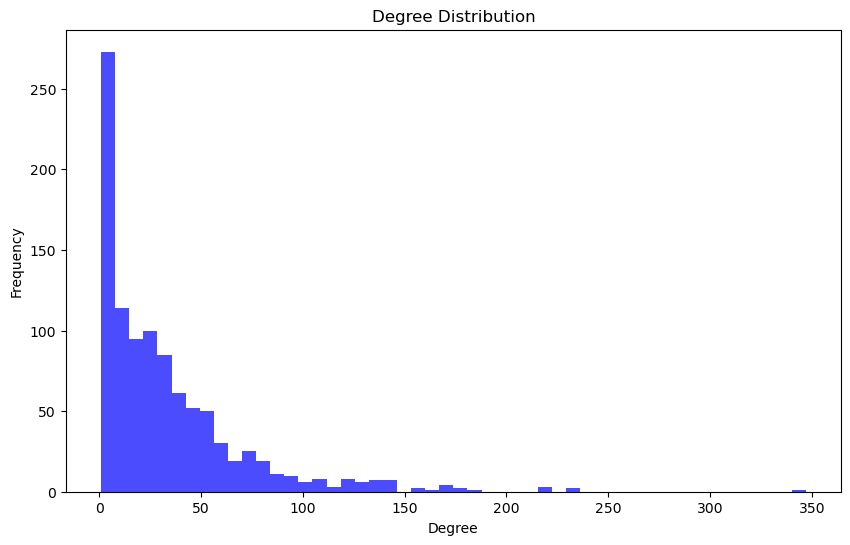

In [23]:
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='blue', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [24]:
sorted_degrees = sorted(degree_dict.values())

In [25]:
bottom_10_percentile = pd.Series(list(degree_dict.values())).quantile(0.1)

In [26]:
bottom_10_nodes = [node for node, degree in degree_dict.items() if degree <= bottom_10_percentile]

In [27]:
bottom_10_nodes = [n for n, d in degree_dict.items() if d <= bottom_10_percentile]
bottom_10_subgraph = G.subgraph(bottom_10_nodes)

In [28]:
bottom_10_subgraph.number_of_nodes()

124

In [29]:
degree_dict = dict(bottom_10_subgraph.degree())

In [30]:
degree_dict

{524: 0,
 561: 0,
 578: 0,
 580: 2,
 583: 0,
 595: 0,
 603: 0,
 606: 0,
 622: 0,
 626: 0,
 633: 2,
 648: 2,
 650: 0,
 653: 2,
 657: 0,
 658: 2,
 660: 2,
 668: 0,
 670: 2,
 675: 2,
 677: 0,
 680: 0,
 684: 2,
 688: 0,
 691: 2,
 692: 0,
 701: 0,
 702: 0,
 703: 2,
 711: 2,
 724: 0,
 731: 2,
 732: 2,
 744: 2,
 746: 2,
 750: 0,
 755: 0,
 759: 0,
 761: 0,
 762: 0,
 770: 0,
 772: 2,
 774: 0,
 775: 0,
 780: 0,
 787: 0,
 790: 0,
 792: 0,
 794: 0,
 795: 0,
 798: 2,
 801: 0,
 808: 2,
 821: 0,
 824: 0,
 827: 0,
 830: 0,
 831: 0,
 834: 0,
 838: 0,
 839: 0,
 842: 0,
 843: 0,
 850: 0,
 853: 0,
 858: 0,
 861: 0,
 862: 0,
 863: 0,
 864: 0,
 868: 0,
 871: 0,
 873: 0,
 875: 0,
 876: 0,
 879: 0,
 881: 0,
 882: 0,
 888: 0,
 891: 0,
 893: 0,
 894: 0,
 897: 0,
 899: 0,
 901: 0,
 902: 0,
 904: 0,
 910: 0,
 915: 0,
 916: 0,
 920: 0,
 928: 0,
 938: 0,
 940: 0,
 941: 0,
 942: 0,
 943: 0,
 944: 0,
 946: 0,
 948: 0,
 959: 0,
 960: 0,
 449: 0,
 961: 0,
 962: 0,
 965: 0,
 966: 0,
 969: 0,
 972: 0,
 973: 0,
 975: 0,
 

In [31]:
top_5_percentile = pd.Series(list(degree_dict.values())).quantile(0.95)

In [32]:
top_5_nodes = [node for node, degree in degree_dict.items() if degree >= top_5_percentile]

In [33]:
top_5_nodes = [n for n, d in degree_dict.items() if d >= top_5_percentile]
top_5_subgraph = G.subgraph(top_5_nodes)

In [34]:
top_5_subgraph.number_of_nodes()

19

## Number of nodes in Bottom 10% Nodes and their Connections : 124
## Number of nodes in Top 5% Nodes and their Connections :19

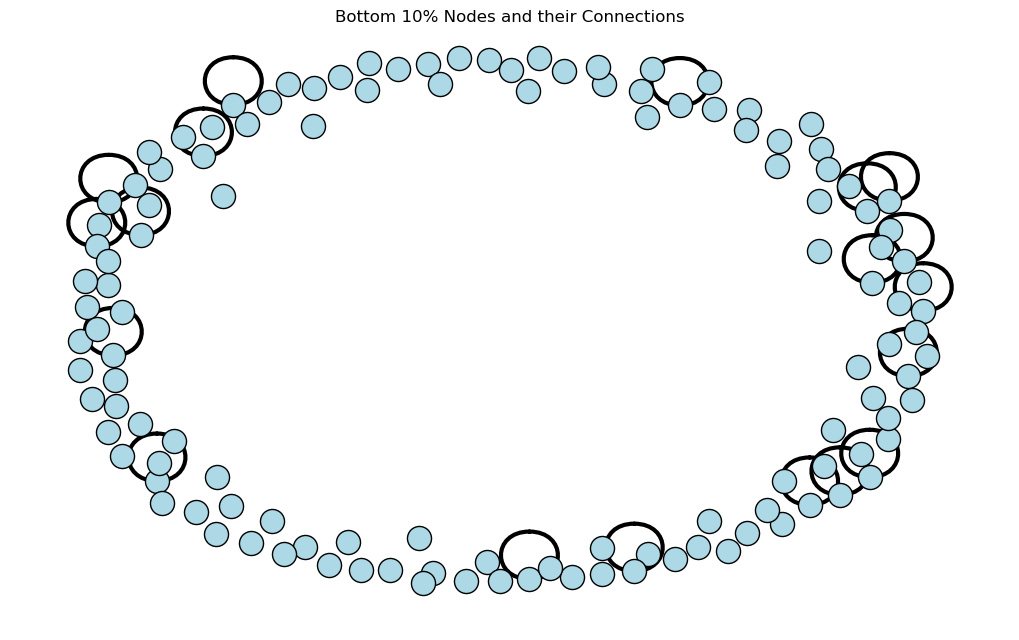

In [36]:
plt.figure(figsize=(10, 6))
nx.draw(bottom_10_subgraph, with_labels=False,
        node_color='lightblue', width = 3, edgecolors="black")
plt.title("Bottom 10% Nodes and their Connections")
plt.show()

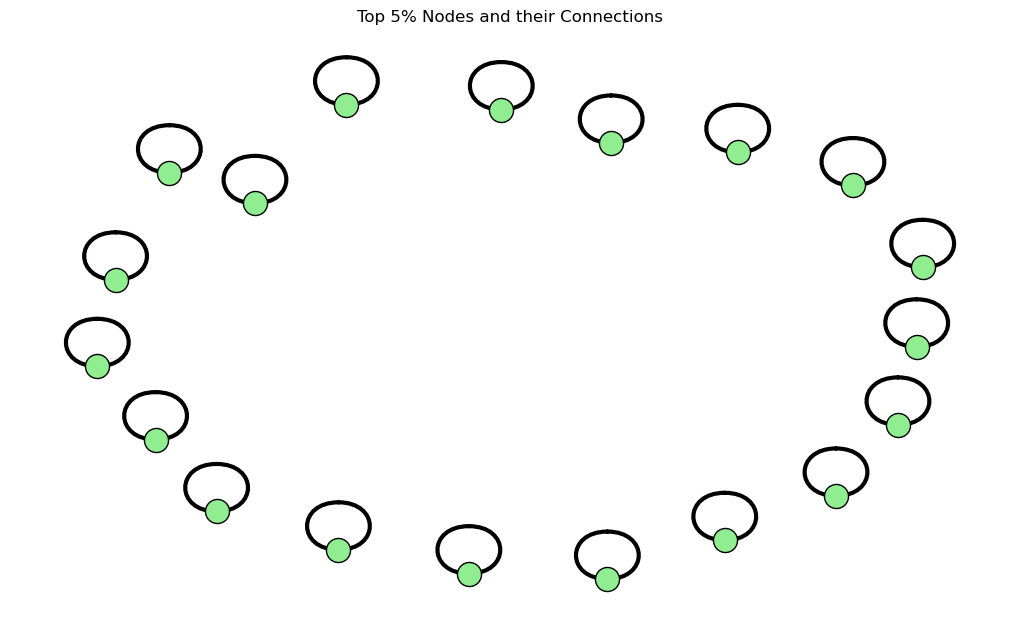

In [40]:
plt.figure(figsize=(10, 6))
nx.draw(top_5_subgraph, with_labels=False,
        node_color='lightgreen', width = 3, edgecolors="black")
plt.title("Top 5% Nodes and their Connections")
plt.show()

In [41]:
connected_components = list(nx.connected_components(G))
connected_components_sizes = [len(c) for c in connected_components]

In [42]:
giant_component_size = max(connected_components_sizes)
giant_component = max(connected_components, key=len)
giant_subgraph = G.subgraph(giant_component)

In [43]:
giant_component = connected_components[0]
giant_component_size = len(giant_component)
giant_subgraph = G.subgraph(giant_component)

In [44]:
print(giant_component_size)

986


## Number of nodes in Giant Component : 986

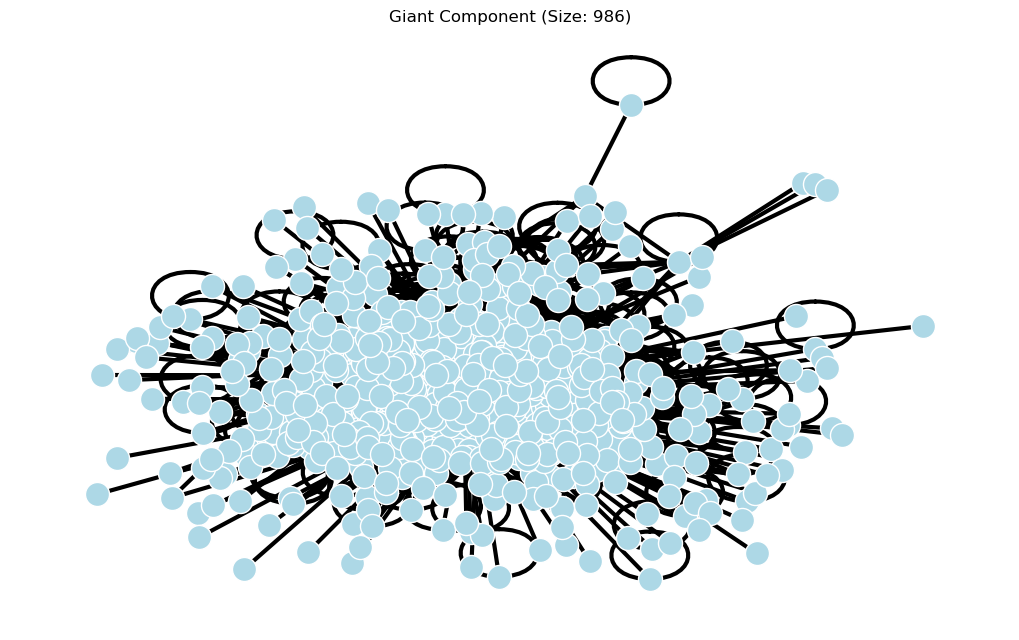

In [45]:
plt.figure(figsize=(10, 6))
nx.draw(giant_subgraph, with_labels=False,
        node_color='lightblue', width = 3, edgecolors="white")
plt.title(f"Giant Component (Size: {giant_component_size})")
plt.show()